In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Finding accident distribution per day

In [2]:
df_full = pd.read_excel("../../OPENDATA_MAP_2017-2022.xlsx", header=0)

dfs = list()
for i in range(17, 23):
    df=pd.read_excel(f"../../../Data/csv/TF_ACCIDENTS_20{i}.xlsx")
    dfs.append(df)

    print(f"File: df_{i}")

File: df_17
File: df_18
File: df_19
File: df_20
File: df_21
File: df_22


In [3]:
print("YEAR\tFULL\tYEARLY")
for year in range(2017,2023):
    count_full = (df_full['DT_YEAR_COLLISION']==year).sum()
    index = year-2017
    count_yearly = dfs[index].shape[0]
    print(f"{year}\t{count_full}\t{count_yearly}")

YEAR	FULL	YEARLY
2017	38025	37827
2018	38453	38260
2019	37719	37520
2020	30251	30121
2021	34660	34496
2022	37643	37445


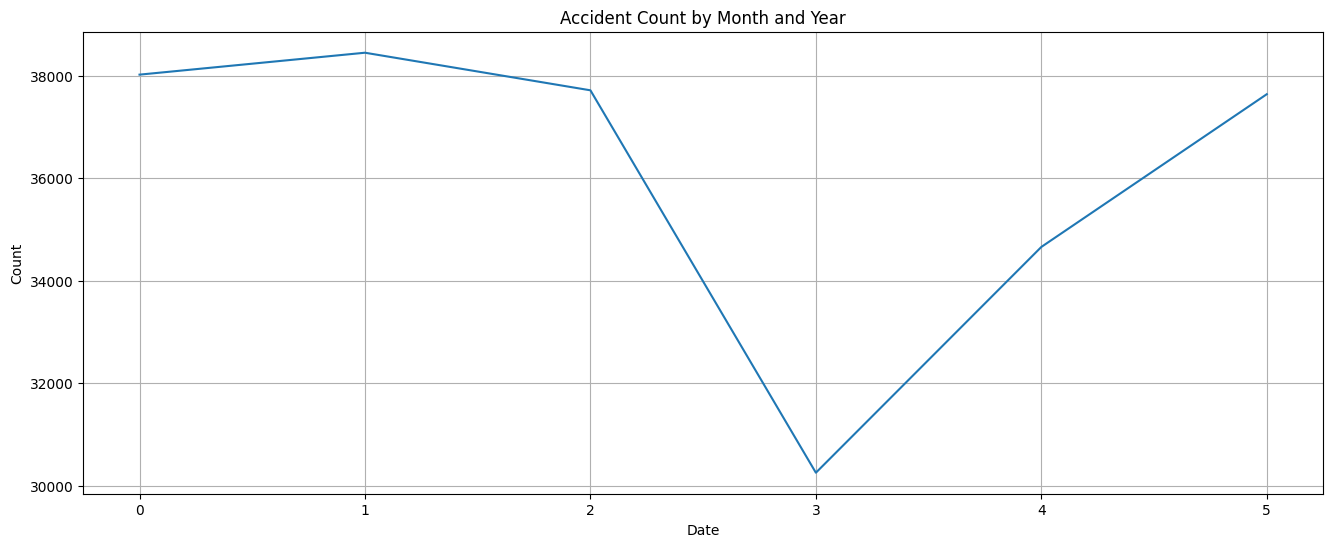

In [8]:
yearly = df_full[['DT_YEAR_COLLISION']]
yearly = yearly.groupby('DT_YEAR_COLLISION').size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(16, 6))  # Increase the width value to your desired size
yearly['count'].plot(kind='line', ax=ax)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Accident Count by Year')
plt.grid()
plt.show()

amount_day / amount_month = percentage of accidents from that month happen on day 

In [33]:
count_day = (dfs[0]['DT_DAY']=='2017-08-19').sum()
day = (dfs[0]['DT_DAY'])[0].date()
count_month = (dfs[0]['DT_DAY'].dt.month==5).sum()
month = dfs[0]['DT_DAY'][0].month

print(count_day/count_month)

0.023111612175873732


In [34]:
df_days = pd.DataFrame({'date':pd.Series([],dtype='object'),'count':pd.Series([],dtype='int64')})
df_months = pd.DataFrame({'year_month':pd.Series([],dtype='object'),'count':pd.Series([],dtype='int64')})
for df in dfs:
    df['DT_DAY'] = pd.to_datetime(df['DT_DAY'])
    temp_day_df = df.groupby(df['DT_DAY'].dt.date).size().reset_index(name='count')
    temp_day_df.rename(columns={'DT_DAY': 'date'}, inplace=True)

    df['year_month'] = df['DT_DAY'].dt.to_period('M')
    temp_month_df = df.groupby(df['year_month']).size().reset_index(name='count')

    df_days = pd.concat([df_days, temp_day_df])
    df_months = pd.concat([df_months, temp_month_df])

C:\Users\hanne\AppData\Local\Temp\ipykernel_20908\2394481135.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_months = pd.concat([df_months, temp_month_df])


In [35]:
test_record = df_days.iloc[:1]
test_day = test_record['date'][0]
test_month = test_day.month
test_year = test_day.year

df_months.head()

,year_month,count
0,2017-01,2712
1,2017-02,2723
2,2017-03,3294
3,2017-04,2858
4,2017-05,3548


result df -> 'date' 'percentage'

sum of percentages/month = 100

In [36]:
merged_df = pd.merge(df_days, df_months, how='left', left_on=pd.to_datetime(df_days['date']).dt.to_period('M'), right_on='year_month')
merged_df['percentage'] = merged_df['count_x'] / merged_df['count_y'] * 100
distribution = merged_df[['date','percentage']]

Test to see if the math is correct

In [37]:
test = merged_df[merged_df['year_month']=='2017-01']
test = test['percentage'].sum()
print(test)

100.0


# Adding dates to df_full

In [38]:
distribution['month'] = pd.DatetimeIndex(distribution['date']).month
distribution['year'] = pd.DatetimeIndex(distribution['date']).year

df_full.insert(2,"date",'')

C:\Users\hanne\AppData\Local\Temp\ipykernel_20908\212483595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distribution['month'] = pd.DatetimeIndex(distribution['date']).month
C:\Users\hanne\AppData\Local\Temp\ipykernel_20908\212483595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distribution['year'] = pd.DatetimeIndex(distribution['date']).year


In [39]:
def generate_random_dates(df_dates):
    pass

In [40]:
## !!! fix the residual !!!
def get_amount_dates(df, count):
    split_values = [int(percentage/100 * count) for percentage in df['percentage']]
    target_values = [(percentage/100 * count) for percentage in df['percentage']]

    split_values = pd.DataFrame({'count': split_values,
                                 'date': df['date']}).reset_index(drop=True)
    target_values = pd.DataFrame({'count': target_values,
                                 'date': df['date']}).reset_index(drop=True)
    while sum(split_values['count']) != count:
        diff = (split_values['count'] - target_values['count']).reset_index(drop=True)
        diff2 = (split_values['count'] - target_values['count'])
        if sum(split_values['count']) < count:
            smallest_index = np.argmin(diff)
            split_values.loc[smallest_index, 'count'] += 1
        else:
            largest_index = np.argmax(diff)
            split_values.loc[largest_index, 'count'] -= 1
    # --- checks to see how well code works
    #split_values['actual'] = split_values['count']/count
    #split_values['target'] = df['percentage']/100
    #split_values['diff'] = split_values['actual'] - split_values['target'] #to check how close to the target percentage we get
    #diff_sum = split_values['diff'].sum() #should give 0.0

    return split_values

In [41]:
ful_copy = df_full.copy()

In [42]:
df_full = ful_copy.copy()

In [43]:
rand_ind_count = 0
for year in df_full['DT_YEAR_COLLISION'].unique():
    #print(f"\nyear{year}")
    for month in df_full['DT_MONTH_COLLISION'].unique():
        count = (df_full[(df_full['DT_YEAR_COLLISION']==year) & (df_full['DT_MONTH_COLLISION']==month)]).shape[0]
        dates = distribution[(distribution['month']==month) & (distribution['year']==year)]
        #df needs to have col named 'percentage'
        date_amounts_df = get_amount_dates(dates, count)
        date_amounts_df['date'] = pd.to_datetime(date_amounts_df.loc[:, 'date'])
        
        filtered_df = df_full[(df_full['DT_YEAR_COLLISION']==year) & (df_full['DT_MONTH_COLLISION']==month)] 
        for index, row in date_amounts_df.iterrows():
            empty_indices = filtered_df[filtered_df['date']==''].index
            random_indices = np.random.choice(empty_indices, size=row['count'],replace=False)
            rand_ind_count += len(random_indices)
            filtered_df.loc[random_indices, 'date'] = row['date']
            df_full.loc[random_indices, 'date'] = row['date']

In [24]:
df_full['date'] = pd.to_datetime(df_full['date'])
df_full['date'] = df_full['date'].dt.date

# EINDELIJK WEG SCHRIJVEN NAAR CSV!!

In [44]:
df_full.to_excel('../../../Data/csv/accidents_w_date.xlsx',index=False)